In [60]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [61]:
img = cv2.imread('./test_images/messi1.jpg')
img.shape

(750, 1000, 3)

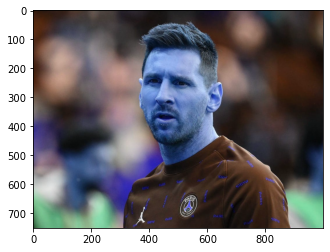

In [62]:
plt.imshow(img)

In [63]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(750, 1000)

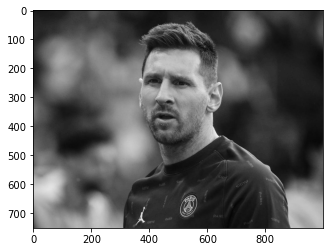

In [64]:
plt.imshow(gray, cmap='gray')

In [65]:
gray

array([[ 24,  24,  24, ...,  49,  50,  50],
       [ 24,  24,  24, ...,  49,  50,  50],
       [ 25,  25,  25, ...,  49,  49,  50],
       ...,
       [ 59,  61,  65, ..., 186, 187, 188],
       [ 58,  61,  64, ..., 186, 187, 188],
       [ 58,  60,  63, ..., 185, 186, 188]], dtype=uint8)

In [66]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[320, 133, 290, 290]])

In [67]:
(x,y,w,h) = faces[0]
x,y,w,h

(320, 133, 290, 290)

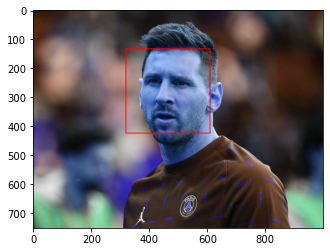

In [68]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(face_img)

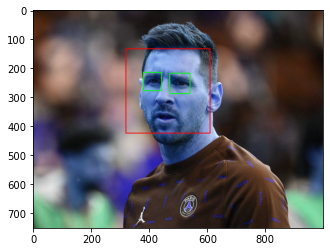

In [69]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh), (0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

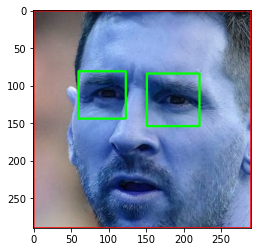

In [70]:
plt.imshow(roi_color, cmap='gray')

In [71]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

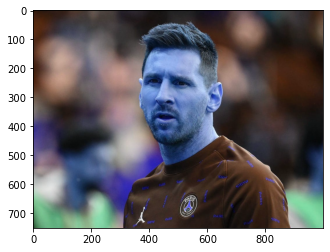

In [72]:
orig_img = cv2.imread('./test_images/messi1.jpg')
plt.imshow(orig_img)

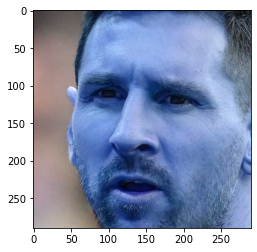

In [73]:
crop_img = get_cropped_image('./test_images/messi1.jpg')
plt.imshow(crop_img)

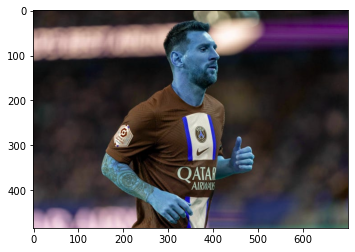

In [74]:
img2 = cv2.imread('./test_images/messi2.jpg')
plt.imshow(img2)

In [75]:
crop2 = get_cropped_image('./test_images/messi2.jpg')
crop2

In [76]:
data_path = "./dataset/"
cr_data_path = "./dataset/cropped/"

In [77]:
import os
img_dirs = []
for entry in os.scandir(data_path):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [78]:
img_dirs

['./dataset/ana de armas',
 './dataset/angelina jolie',
 './dataset/barack obama',
 './dataset/denzel washington',
 './dataset/katy perry',
 './dataset/leonardo dicaprio',
 './dataset/lionel messi',
 './dataset/luv uprety',
 './dataset/rajesh hamal',
 './dataset/robert de niro',
 './dataset/shahrukh khan']

In [79]:
import shutil
if os.path.exists(cr_data_path):
    shutil.rmtree(cr_data_path)
os.mkdir(cr_data_path)

In [80]:
cropped_image_dirs = []
person_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    person_name = img_dir.split('/')[-1]
    print(person_name)
    
    person_file_names_dict[person_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = cr_data_path + person_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in: ", cropped_folder)
                
            cropped_file_name = person_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            person_file_names_dict[person_name].append(cropped_file_path)
            count += 1

ana de armas
Generating cropped images in:  ./dataset/cropped/ana de armas
angelina jolie
Generating cropped images in:  ./dataset/cropped/angelina jolie
barack obama
Generating cropped images in:  ./dataset/cropped/barack obama
denzel washington
Generating cropped images in:  ./dataset/cropped/denzel washington
katy perry
Generating cropped images in:  ./dataset/cropped/katy perry
leonardo dicaprio
Generating cropped images in:  ./dataset/cropped/leonardo dicaprio
lionel messi
Generating cropped images in:  ./dataset/cropped/lionel messi
luv uprety
Generating cropped images in:  ./dataset/cropped/luv uprety
rajesh hamal
Generating cropped images in:  ./dataset/cropped/rajesh hamal
robert de niro
Generating cropped images in:  ./dataset/cropped/robert de niro
shahrukh khan
Generating cropped images in:  ./dataset/cropped/shahrukh khan


In [81]:
import pywt

In [82]:
def w2d(img, mode='har', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)  #convert to grayscale
    # convert to float
    imArray = np.float32(imArray)
    imArray /=255;
    
    coeffs = pywt.wavedec2(imArray, mode, level=level) #compute coefficients
    
    #Process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

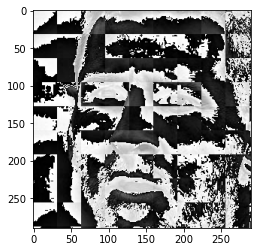

In [84]:
im_har = w2d(crop_img, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [85]:
person_file_names_dict

{'ana de armas': ['./dataset/cropped/ana de armas/ana de armas1.png',
  './dataset/cropped/ana de armas/ana de armas2.png',
  './dataset/cropped/ana de armas/ana de armas3.png',
  './dataset/cropped/ana de armas/ana de armas4.png',
  './dataset/cropped/ana de armas/ana de armas5.png',
  './dataset/cropped/ana de armas/ana de armas6.png',
  './dataset/cropped/ana de armas/ana de armas7.png',
  './dataset/cropped/ana de armas/ana de armas8.png',
  './dataset/cropped/ana de armas/ana de armas9.png',
  './dataset/cropped/ana de armas/ana de armas10.png',
  './dataset/cropped/ana de armas/ana de armas11.png',
  './dataset/cropped/ana de armas/ana de armas12.png',
  './dataset/cropped/ana de armas/ana de armas13.png',
  './dataset/cropped/ana de armas/ana de armas14.png',
  './dataset/cropped/ana de armas/ana de armas15.png',
  './dataset/cropped/ana de armas/ana de armas16.png',
  './dataset/cropped/ana de armas/ana de armas17.png',
  './dataset/cropped/ana de armas/ana de armas18.png',
  '

In [86]:
person_file_names_dict = {}
for img_dir in cropped_image_dirs:
    person_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    person_file_names_dict[person_name] = file_list
    
person_file_names_dict

{'ana de armas': ['./dataset/cropped/ana de armas\\ana de armas1.png',
  './dataset/cropped/ana de armas\\ana de armas10.png',
  './dataset/cropped/ana de armas\\ana de armas11.png',
  './dataset/cropped/ana de armas\\ana de armas12.png',
  './dataset/cropped/ana de armas\\ana de armas13.png',
  './dataset/cropped/ana de armas\\ana de armas14.png',
  './dataset/cropped/ana de armas\\ana de armas15.png',
  './dataset/cropped/ana de armas\\ana de armas17.png',
  './dataset/cropped/ana de armas\\ana de armas18.png',
  './dataset/cropped/ana de armas\\ana de armas19.png',
  './dataset/cropped/ana de armas\\ana de armas20.png',
  './dataset/cropped/ana de armas\\ana de armas21.png',
  './dataset/cropped/ana de armas\\ana de armas22.png',
  './dataset/cropped/ana de armas\\ana de armas23.png',
  './dataset/cropped/ana de armas\\ana de armas26.png',
  './dataset/cropped/ana de armas\\ana de armas28.png',
  './dataset/cropped/ana de armas\\ana de armas3.png',
  './dataset/cropped/ana de armas\

In [87]:
class_dict = {}
count = 0
for person_name in person_file_names_dict.keys():
    class_dict[person_name] = count
    count +=1
    
class_dict

{'ana de armas': 0,
 'angelina jolie': 1,
 'barack obama': 2,
 'denzel washington': 3,
 'katy perry': 4,
 'leonardo dicaprio': 5,
 'lionel messi': 6,
 'luv uprety': 7,
 'rajesh hamal': 8,
 'robert de niro': 9,
 'shahrukh khan': 10}

In [93]:
X, y = [], []
for person_name, training_files in person_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[person_name])

In [94]:
len(X[0])

4096

In [95]:
X[0]

array([[ 7],
       [ 8],
       [12],
       ...,
       [ 2],
       [16],
       [29]], dtype=uint8)

In [96]:
y[0]

0

In [97]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(640, 4096)

# Model Training

In [98]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.56875

In [100]:
len(X_test)

160

In [101]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57        19
           1       0.43      0.69      0.53        13
           2       0.90      0.82      0.86        11
           3       0.41      0.54      0.47        13
           4       0.57      0.67      0.62        12
           5       0.53      0.86      0.66        37
           6       0.88      0.78      0.82         9
           7       1.00      0.20      0.33        10
           8       0.71      0.56      0.63         9
           9       0.40      0.14      0.21        14
          10       0.00      0.00      0.00        13

    accuracy                           0.57       160
   macro avg       0.59      0.53      0.52       160
weighted avg       0.56      0.57      0.53       160



C:\Users\anish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [107]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [108]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.643750,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.352083,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.656250,{'logisticregression__C': 1}


In [110]:
best_estimators['svm'].score(X_test,y_test)

0.625

In [111]:
best_estimators['random_forest'].score(X_test,y_test)

0.35

In [112]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.675

In [113]:
best_clf = best_estimators['logistic_regression']

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  5,  0,  1,  1,  1,  0,  0,  0,  0,  1],
       [ 1, 10,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  9,  0,  1,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  9,  0,  0,  0,  0,  0,  1],
       [ 1,  2,  1,  2,  0, 30,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  1,  3,  3,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  7,  0,  1],
       [ 0,  0,  0,  1,  0,  5,  1,  0,  0,  7,  0],
       [ 1,  0,  1,  2,  0,  2,  1,  0,  1,  1,  4]], dtype=int64)

Text(114.0, 0.5, 'Truth')

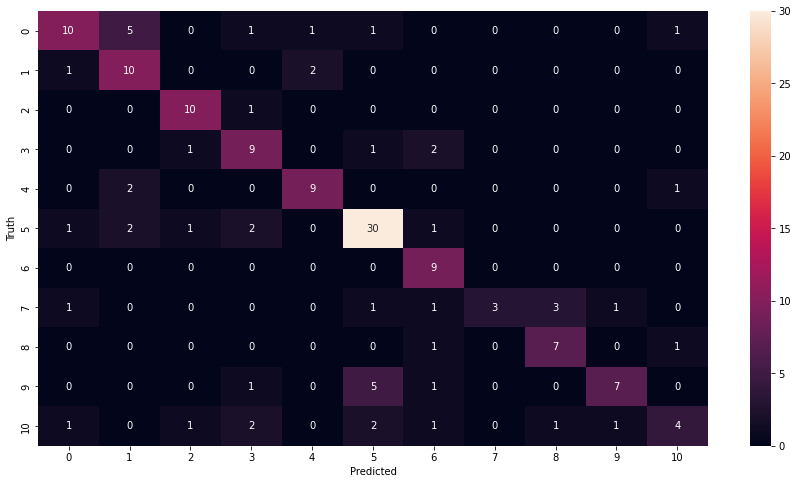

In [118]:
import seaborn as sn
plt.figure(figsize = (15,8))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [119]:
class_dict

{'ana de armas': 0,
 'angelina jolie': 1,
 'barack obama': 2,
 'denzel washington': 3,
 'katy perry': 4,
 'leonardo dicaprio': 5,
 'lionel messi': 6,
 'luv uprety': 7,
 'rajesh hamal': 8,
 'robert de niro': 9,
 'shahrukh khan': 10}

In [120]:
!pip install joblib
import joblib

joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [121]:
import json
with open("class_dict.json", "w") as f:
    f.write(json.dumps(class_dict))